In [75]:
#Importa a biblioteca do pandas
import pandas as pd

#Leitura do arquivo csv
cadastro_df = pd.read_csv("cadastro.csv")
preco_da_gasolina_df = pd.read_csv("preco_da_gasolina.csv")
salario_profisoes_df = pd.read_csv("salario_profissoes.csv")

### Qual a idade média das pessoas no cadastro ?

In [76]:
#Filtra ano_nascimento
cadastro_df[['ano_nascimento']].head(3)

,ano_nascimento
0,1985
1,1970
2,1990


In [77]:
# Cria uma coluna idade com base no ano_nascimento
cadastro_df[['idade']] = 2020 - cadastro_df.filter(like='ano_nascimento')

In [78]:
# Chamei o metodo head para validar que o campo foi criado corretamente
cadastro_df.head(3)

,nome,sobrenome,ano_nascimento,sexo,cidade,profissão,experiencia profissional,estado_civil,filhos,lazer_final_de_semana,pratica_esporte,qual_esporte,quanta_vezes_na_semana_pratica_esporte,tem carro,escolaridade,idade
0,Dirceu,Manolo,1985,m,São Vicente,Cientista de Dados,4,Casado,1,"estudar, academia, jogar video game,surfar",sim,academia,3.0,sim,Ensino Superior,35
1,Maria,Silva,1970,f,Santos,dona de casa,2,Casada,3,ver tv,não,-,0.0,não,Ensino Médio,50
2,Adalberto,Martins,1990,m,São Paulo,desempregado,0,Solteiro,1,jogar bola,sim,jogo bola,2.0,sim,Ensino Superior,30


In [79]:
#cria um novo df para pegar a idade
idade_df = cadastro_df[['idade']]

In [80]:
#calcula a idade media das pessoas
idade_df.mean()

idade    32.733333
dtype: float64

### Quantos homens tem no cadastro ?

In [81]:
#verificar o shape
cadastro_df.shape

(30, 16)

In [82]:
#Validar que não há valor nulo para a coluna sexo
cadastro_df.isnull().sum()

nome                                      0
sobrenome                                 1
ano_nascimento                            0
sexo                                      0
cidade                                    0
profissão                                 0
experiencia profissional                  0
estado_civil                              0
filhos                                    0
lazer_final_de_semana                     0
pratica_esporte                           1
qual_esporte                              0
quanta_vezes_na_semana_pratica_esporte    3
tem carro                                 1
escolaridade                              0
idade                                     0
dtype: int64

In [83]:
#cria um novo df para pegar a sexo
sexo_df = cadastro_df[['sexo']]

In [84]:
#conta a quantidade de linhas e armazena em um novo df
sexo_df.loc[sexo_df['sexo'] == 'm'].count()

sexo    16
dtype: int64

### Quantas mulheres tem no cadastro ?

In [85]:
#conta a quantidade de linhas e armazena em um novo df
sexo_df.loc[sexo_df['sexo'] == 'f'].count()

sexo    14
dtype: int64

### Qual a idade média dos homens e das mulheres ?

In [86]:
cadastro_df.head(5)

,nome,sobrenome,ano_nascimento,sexo,cidade,profissão,experiencia profissional,estado_civil,filhos,lazer_final_de_semana,pratica_esporte,qual_esporte,quanta_vezes_na_semana_pratica_esporte,tem carro,escolaridade,idade
0,Dirceu,Manolo,1985,m,São Vicente,Cientista de Dados,4,Casado,1,"estudar, academia, jogar video game,surfar",sim,academia,3.0,sim,Ensino Superior,35
1,Maria,Silva,1970,f,Santos,dona de casa,2,Casada,3,ver tv,não,-,0.0,não,Ensino Médio,50
2,Adalberto,Martins,1990,m,São Paulo,desempregado,0,Solteiro,1,jogar bola,sim,jogo bola,2.0,sim,Ensino Superior,30
3,João,Aparecido,1950,m,Monte Alto,Gerente de Projeto,3,Viuvo,2,Nã faço nada,NaN,-,NaN,sim,Ensino Superior,70
4,Marta,da Silva,1983,f,São Caetano,Auxiliar de Enfermagem,2,Solteira,0,caminhar,sim,crossfit,4.0,não,Ensimo Tecnico,37


In [87]:
#cria um novo df para pegar a sexo
idade_sexo_df = cadastro_df[['sexo','idade']]

In [88]:
#calcula idade media dos homens
idade_sexo_df.loc[sexo_df['sexo'] == 'm'].mean()

idade    31.75
dtype: float64

In [89]:
#calcula idade media das mulheres
idade_sexo_df.loc[sexo_df['sexo'] == 'f'].mean()

idade    33.857143
dtype: float64

### Crie um gráfico de barras e mostre a distribuição de escolaridade no cadastro ?

In [90]:
#transforma os dados da coluna em letra maiusula --normalização--
cadastro_df['escolaridade'] = cadastro_df['escolaridade'].str.upper()

In [91]:
#corrige nomenclatura de ensino tecnico
cadastro_df = cadastro_df.replace(to_replace ="ENSIMO TECNICO", value ="ENSINO TÉCNICO") 

In [92]:
#cria uma coluna quantidade
cadastro_df['quantidade'] = 1

In [93]:
grafico_df = cadastro_df [['escolaridade','quantidade']].groupby ('escolaridade').sum().reset_index()

In [94]:
grafico_df

,escolaridade,quantidade
0,ENSINO MÉDIO,8
1,ENSINO SUPERIOR,21
2,ENSINO TÉCNICO,1


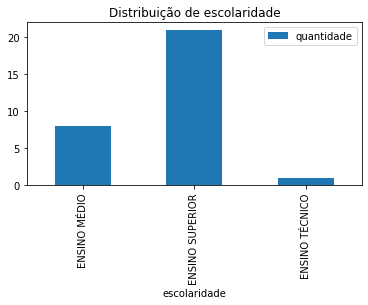

In [95]:
#grafico de distribuicao de escolaridade
cadastro_df [['escolaridade','quantidade']].groupby ('escolaridade').sum().plot(kind='bar', title='Distribuição de escolaridade', figsize=(6, 3), fontsize = 10)

### Mostre a Média Salarial do cadastro ?

In [96]:
# remove os espaços de todas as strings dos dfs que serão utilizados
def trim_all_columns(df):
    """
    Trim whitespace from ends of each value across all series in dataframe
    """
    trim_strings = lambda x: x.strip() if isinstance(x, str) else x
    return df.applymap(trim_strings)

cadastro_df = trim_all_columns(cadastro_df)
salario_profisoes_df = trim_all_columns(salario_profisoes_df)

In [97]:
#renomeia a coluna do datafrade salario
salario_profisoes_df = salario_profisoes_df.rename(columns={'Profissões': 'profissão'})

In [98]:
#cria um novo df com o resultado do merge
cadastro_salario_df = pd.merge(cadastro_df, salario_profisoes_df, on='profissão')

In [99]:
#Calcula a média salarial antes e depois 3 anos
cadastro_salario_df[['salario até 3 anos','salaior +3 anos']].mean()

salario até 3 anos    3486.206897
salaior +3 anos       6103.448276
dtype: float64

### Quem tem o maior salário?

In [100]:
#maior salario até 3 anos
cadastro_salario_df[['nome', 'profissão', 'salario até 3 anos']][cadastro_salario_df['salario até 3 anos']==cadastro_salario_df['salario até 3 anos'].max()]

,nome,profissão,salario até 3 anos
9,Mirtes,Médica,12000


In [101]:
#maior salario acima de 3 anos
cadastro_salario_df[['nome', 'profissão', 'salaior +3 anos']][cadastro_salario_df['salaior +3 anos']==cadastro_salario_df['salaior +3 anos'].max()]

,nome,profissão,salaior +3 anos
9,Mirtes,Médica,20000


### Tirando desempregado quem recebe menos ?

In [102]:
#cria um df novo com quem recebe menos
recebe_menos = cadastro_salario_df[['nome', 'profissão', 'salaior +3 anos']][cadastro_salario_df['salaior +3 anos']==cadastro_salario_df['salaior +3 anos'].min()]

In [103]:
#remove os desempregados da lista
recebe_menos.loc[recebe_menos['profissão']!='desempregado']

,nome,profissão,salaior +3 anos
10,Camila,estudante,0
11,Gabriel,estudante,0


### Quantas pessoas gostam de caminhar no final de semana ?

In [104]:
#Padronizar o dado
cadastro_df['lazer_final_de_semana'] = cadastro_df['lazer_final_de_semana'].str.upper()

In [105]:
#contagem das pessoas
cadastro_df[['lazer_final_de_semana']].query('lazer_final_de_semana.str.contains("CAMINHAR")', engine='python').count()

lazer_final_de_semana    4
dtype: int64

### Crie um gráfico mostrando entre a relação de escolaridade e quem pratica esporte ?

In [106]:
#cria um novo df com os campos que serão utilizados
df_escXesp = cadastro_df[['pratica_esporte','escolaridade','quantidade']]

In [107]:
#dropa a linha que está com valor nulo para esporte
df_escXesp= df_escXesp.drop([3])
df_escXesp.reset_index()

,index,pratica_esporte,escolaridade,quantidade
0,0,sim,ENSINO SUPERIOR,1
1,1,não,ENSINO MÉDIO,1
2,2,sim,ENSINO SUPERIOR,1
3,4,sim,ENSINO TÉCNICO,1
4,5,sim,ENSINO MÉDIO,1
5,6,não,ENSINO MÉDIO,1
6,7,sim,ENSINO SUPERIOR,1
7,8,não,ENSINO SUPERIOR,1
8,9,sim,ENSINO SUPERIOR,1
9,10,sim,ENSINO SUPERIOR,1


In [108]:
df_escXesp['pratica_esporte'] = df_escXesp['pratica_esporte'].str.upper().reset_index()

In [109]:
#ensino medio
df_escXesp.loc[df_escXesp['escolaridade'] == 'ENSINO MÉDIO'] [['pratica_esporte','quantidade']].groupby ('pratica_esporte').sum()

,quantidade
pratica_esporte,
1.0,1
6.0,1
7.0,1
14.0,1
18.0,1
19.0,1
21.0,1
24.0,1


In [110]:
#ensino supeior
df_escXesp.loc[df_escXesp['escolaridade'] == 'ENSINO SUPERIOR'] [['pratica_esporte','quantidade']].groupby ('pratica_esporte').sum()

,quantidade
pratica_esporte,
0.0,1
2.0,1
8.0,1
9.0,1
10.0,1
11.0,1
12.0,1
13.0,1
15.0,1


In [111]:
#ensino tecnico
df_escXesp.loc[df_escXesp['escolaridade'] == 'ENSINO TÉCNICO'] [['pratica_esporte','quantidade']].groupby ('pratica_esporte').sum()

,quantidade
pratica_esporte,
5.0,1


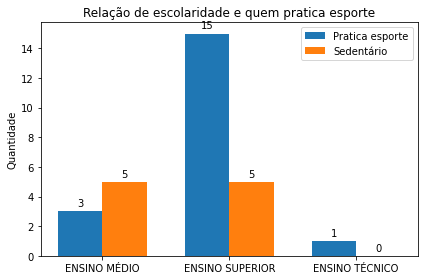

In [112]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['ENSINO MÉDIO', 'ENSINO SUPERIOR', 'ENSINO TÉCNICO']
sim = [3, 15, 1] 
nao = [5, 5, 0]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, sim, width, label='Pratica esporte')
rects2 = ax.bar(x + width/2, nao, width, label='Sedentário')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Quantidade')
ax.set_title('Relação de escolaridade e quem pratica esporte')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

### Crie um mapa de calor ?

### Mostre de forma gráfica a distribuição de estados do cadastro ?

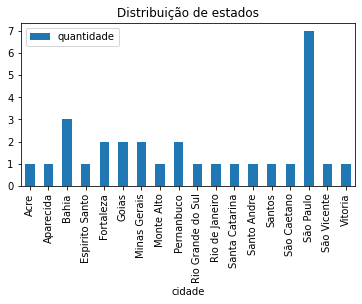

In [113]:
cadastro_df[['cidade','quantidade']].groupby ('cidade').sum().plot(kind='bar', title='Distribuição de estados', figsize=(6, 3), fontsize = 10)